### ライブラリインストール

In [58]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 観光客に関するデータ ：TouristData.csv

観光客の出身国、来日月、年齢、興味（観光（自然・都市）、買物（本物・転売）、
移住を聞いている。興味は１～５の数値で表現（大きいほど興味強）

In [26]:
tourist = pd.read_csv('data/TouristData.csv')
tourist.head()

,TouristID,Country,Month_To_Japan,Age,SightSeeing_Nature,SightSeeing_City,Shopping_quality,Shopping_resale,Emigration
0,TW10068,Taiwan,1,48,3,5,1,1,1
1,HK40048,HongKong,1,25,3,4,4,1,1
2,TH30012,Thailand,1,46,3,4,4,1,1
3,CH40089,China,1,50,4,3,2,1,1
4,HK60047,HongKong,1,41,3,3,2,4,1


### 全体的な数値分析

In [27]:
tourist.describe()

,Month_To_Japan,Age,SightSeeing_Nature,SightSeeing_City,Shopping_quality,Shopping_resale,Emigration
count,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000
mean,6.623980,48.477977,3.309135,3.305873,1.890701,1.936378,1.040783
std,3.256849,6.579989,0.857066,0.964808,1.051085,1.403505,0.197868
min,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,45.000000,3.000000,3.000000,1.000000,1.000000,1.000000
50%,7.000000,49.000000,3.000000,3.000000,2.000000,1.000000,1.000000
75%,9.000000,53.000000,4.000000,4.000000,2.000000,3.000000,1.000000
max,12.000000,60.000000,5.000000,5.000000,4.000000,5.000000,2.000000


### ①どのような国の人が来るのか

韓国・中国・台湾の全体に占める割合：66.721%


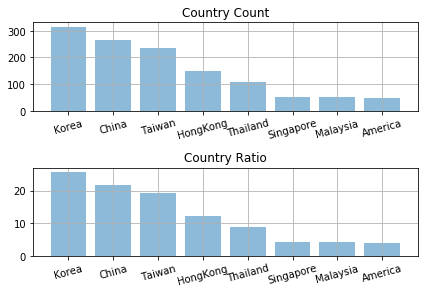

In [28]:
%matplotlib inline

## 件数カウント
count_country = tourist['Country'].value_counts().sort_values(ascending=False)

plt.subplot(2, 1, 1)
plt.title('Country Count')
plt.grid(True)
plt.bar(x=count_country.index, height=count_country.values, alpha=0.5);
plt.tight_layout();
plt.xticks(rotation=15);

## 件数の占める割合計算
ratio_country = (tourist['Country'].value_counts()*100/tourist['Country'].value_counts().sum()).sort_values(ascending=False)

plt.subplot(2, 1, 2)
plt.title('Country Ratio')
plt.grid(True)
plt.bar(x=ratio_country.index, height=ratio_country.values, alpha=0.5);
plt.tight_layout();
plt.xticks(rotation=15);

print(f'韓国・中国・台湾の全体に占める割合：{ratio_country[0:3].sum():.3f}%')

上記に関して
* 最も多いのは韓国
* 韓国・中国・台湾に着目すれば半分以上が対象になる

### ②いつ人が来るのか

7月~9月の全体に占める割合：31.974%


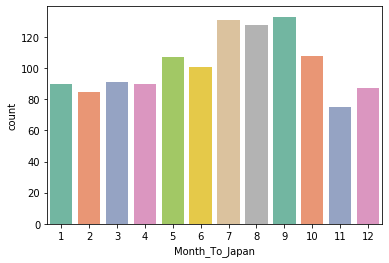

In [29]:
sns.countplot(tourist["Month_To_Japan"], palette='Set2');

July_to_Sep = len(tourist.query("7 <= Month_To_Japan <= 9"))

print(f'7月~9月の全体に占める割合：{July_to_Sep/len(tourist):.3%}')

上記に関して
* 第１ステップとして７〜９月に注目すれば良さそう

## 観光客の購買データ：PurchaseData.csv
どの観光客が、何月に来日し、どんな店で、どんなものを購入したか、
それはいくらだったかが記録されている。

In [30]:
purchase = pd.read_csv('data/PurchaseData.csv')
purchase.head()

,ID,Month_To_Japan,ShopCode,ItemCode,Amount
0,AM10002,1,1,2,2300
1,AM10002,1,1,3,800
2,SP20004,1,1,3,800
3,SP50006,1,1,3,900
4,TH30008,1,1,3,900


## 商品分類、店の情報：ItemMaster.csv、ShopMaster.csv
購入した商品の分類、店のタイプがマスターになっている。

In [31]:
item = pd.read_csv('data/ItemMaster.csv')
item.head()

,ItemCode,ItemName
0,1,Cosmetics and Perfume
1,2,Food Drink Alcohol and Tobacco
2,3,Confectionery
3,4,Baby goods
4,5,Pharmaceuticals Health-goods Toiletries


In [32]:
shop = pd.read_csv('data/ShopMaster.csv')
shop.head()

,ShopCode,ShopName
0,1,convenience store
1,2,super market
2,3,department store
3,4,discount shop
4,5,Drug store


### 観光客の購買データ・商品の分類・店の情報データから分析

In [33]:
### データを結合して意味づけ

purchase_info = pd.merge(purchase, item, on='ItemCode', how='outer')
purchase_info = pd.merge(purchase_info, shop, on='ShopCode', how='outer')
purchase_info

,ID,Month_To_Japan,ShopCode,ItemCode,Amount,ItemName,ShopName
0,AM10002,1,1,2,2300,Food Drink Alcohol and Tobacco,convenience store
1,TH80010,1,1,2,5200,Food Drink Alcohol and Tobacco,convenience store
2,KR60038,1,1,2,4500,Food Drink Alcohol and Tobacco,convenience store
3,KR10040,1,1,2,3500,Food Drink Alcohol and Tobacco,convenience store
4,TW60064,1,1,2,4100,Food Drink Alcohol and Tobacco,convenience store
...,...,...,...,...,...,...,...
11042,CH91223,12,6,7,39000,Appliance,Consumer electronics store
11043,CH91223,12,6,7,22100,Appliance,Consumer electronics store
11044,CH11224,12,6,7,28900,Appliance,Consumer electronics store
11045,CH11224,12,6,7,25600,Appliance,Consumer electronics store


### 分析を行うための関数を作成
* 購入額の平均
* 購入したお店の名前（件数上位３件）
* 購入した商品の名前（件数上位３件）
* お店と商品の組み合わせ（件数上位５件）

お店・商品・お店商品の組み合わせについての件数グラフ作成


* 購入したお店の名前（合計額上位３件）
* 購入した商品の名前（合計額上位３件）
* お店と商品の組み合わせ（合計額上位５件）

お店・商品・お店商品の組み合わせについての件数グラフ作成

In [113]:
figsize=(30, 10)

def analysis_purchase(df):
    amount_mean = df['Amount'].mean()
    shop_count = df['ShopName'].value_counts()
    item_count = df['ItemName'].value_counts()
    df["Shop-Item"] = df['ShopName'] + " | " + df['ItemName']
    shopitem_count = df['Shop-Item'].value_counts()
    
    print(f'Amount 平均: {amount_mean:.3f}')
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=figsize)
    
    print(f'========== Shop件数 ==========\n{shop_count[:3]}')
    sns.countplot(df['ShopName'], palette='Set2', ax=ax1);
    
    print(f'========== Item件数 ==========\n{item_count[:3]}')
    chart2 = sns.countplot(df['ItemName'], palette='Set2', ax=ax2)
    chart2.set_xticklabels(chart2.get_xticklabels(), rotation=5)
    
    print(f'========== ShopItem件数 ==========\n{shopitem_count[:3]}')
    chart3 = sns.countplot(df['Shop-Item'], palette='Set2', ax=ax3)
    chart3.set_xticklabels(chart3.get_xticklabels(), rotation=90)
    
def analysis_purchase_amount(df):
    
    shop_amount = df.groupby('ShopName').sum().sort_values(by='Amount', ascending=False)
    shop_amount = shop_amount['Amount']
    item_amount = df.groupby('ItemName').sum().sort_values(by='Amount', ascending=False)
    item_amount = item_amount['Amount']
    df["Shop-Item"] = df['ShopName'] + " | " + df['ItemName']
    shopitem_amount = df.groupby('Shop-Item').sum().sort_values(by='Amount', ascending=False)
    shopitem_amount = shopitem_amount['Amount']
    
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=figsize)
    
    print(f'========== Shop合計額 ==========\n{shop_amount[:3]}')
    ax1.set_title('ShopAmount')
    ax1.grid(True)
    ax1.bar(x=shop_amount.index, height=shop_amount.values, alpha=0.5);
    ax1.set_xticklabels(shop_amount.index, rotation=10)
    
    print(f'========== Item合計額 ==========\n{item_amount[:3]}')
    ax2.set_title('ItemAmount')
    ax2.grid(True)
    ax2.bar(x=item_amount.index, height=item_amount.values, alpha=0.5);
    ax2.set_xticklabels(item_amount.index, rotation=5)
    
    print(f'========== ShopItem合計額 ==========\n{shopitem_amount[:3]}')
    ax3.set_title('ShopItemAmount')
    ax3.grid(True)
    ax3.bar(x=shopitem_amount.index, height=shopitem_amount.values, alpha=0.5);
    ax3.set_xticklabels(shopitem_amount.index, rotation=90)

#### 全体分析

Amount 平均: 6901.521
========== Shop件数 ==========
Drug store        2733
Duty-free shop    2316
Souvenir shop     1707
Name: ShopName, dtype: int64
========== Item件数 ==========
Confectionery                              4808
Pharmaceuticals Health-goods Toiletries    1638
Food Drink Alcohol and Tobacco             1437
Name: ItemName, dtype: int64
========== ShopItem件数 ==========
Souvenir shop | Confectionery     1447
Drug store | Confectionery        1169
Duty-free shop | Confectionery     936
Name: Shop-Item, dtype: int64


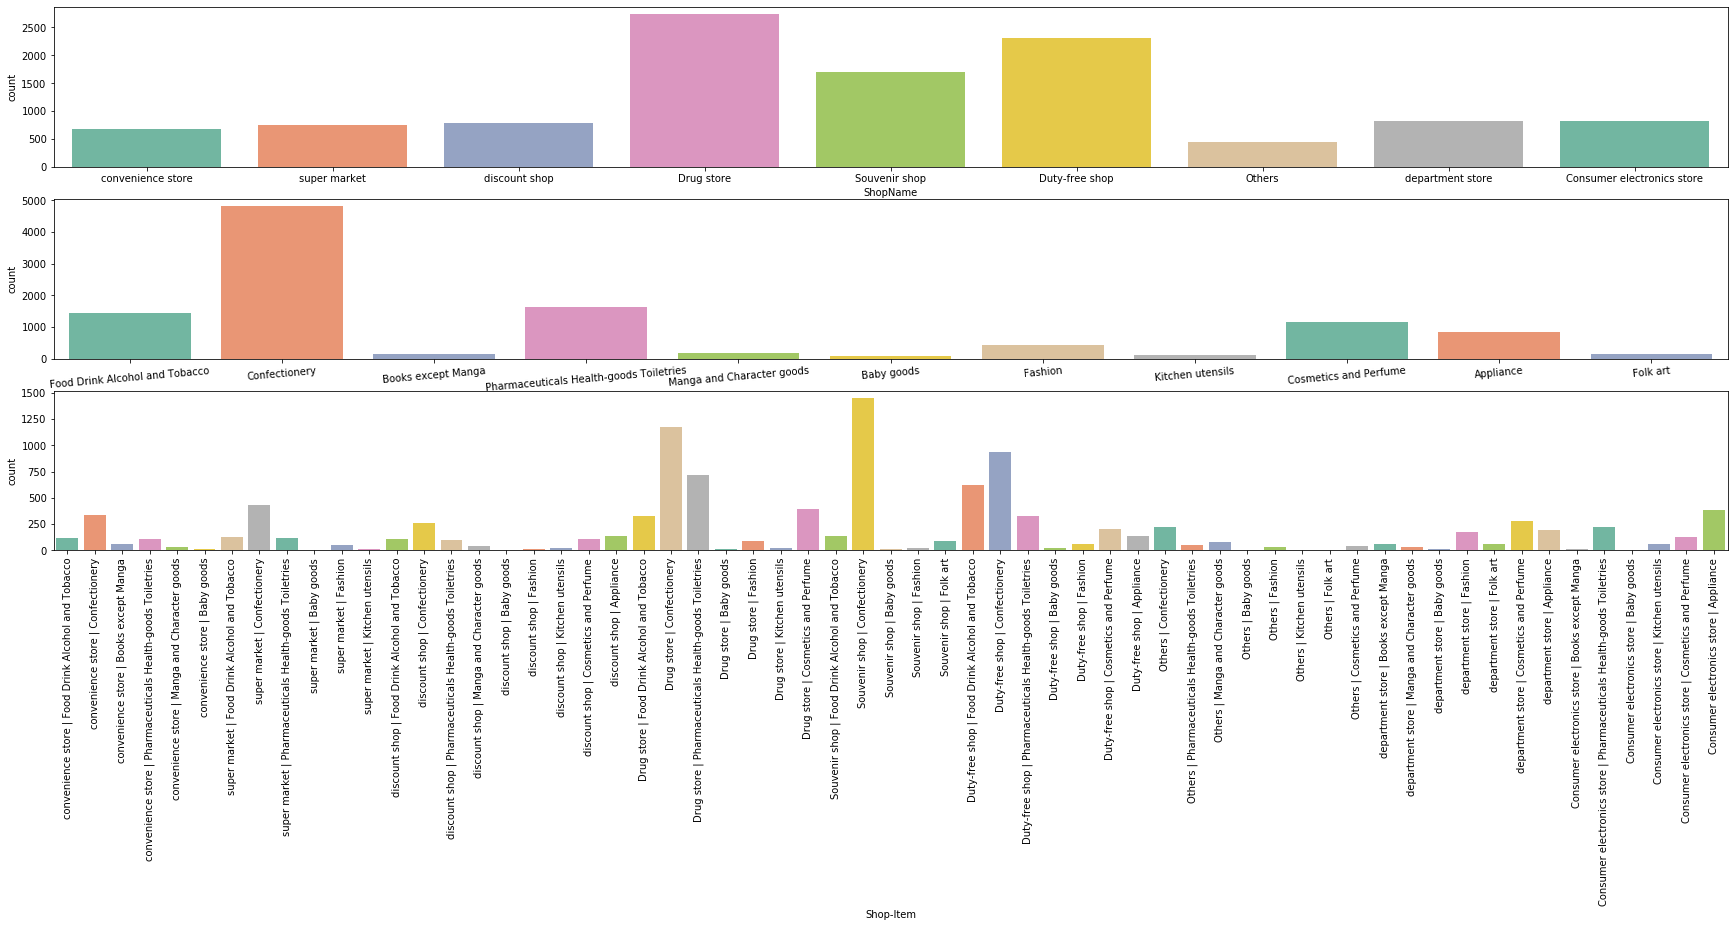

In [114]:
analysis_purchase(purchase_info);

========== Shop合計額 ==========
ShopName
Consumer electronics store    15007200
department store              14827700
Drug store                    14370900
Name: Amount, dtype: int64
========== Item合計額 ==========
ItemName
Appliance                                  25388300
Fashion                                    18144800
Pharmaceuticals Health-goods Toiletries    13121800
Name: Amount, dtype: int64
========== ShopItem合計額 ==========
Shop-Item
Consumer electronics store | Appliance    11433700
department store | Fashion                 7015400
department store | Appliance               5785800
Name: Amount, dtype: int64


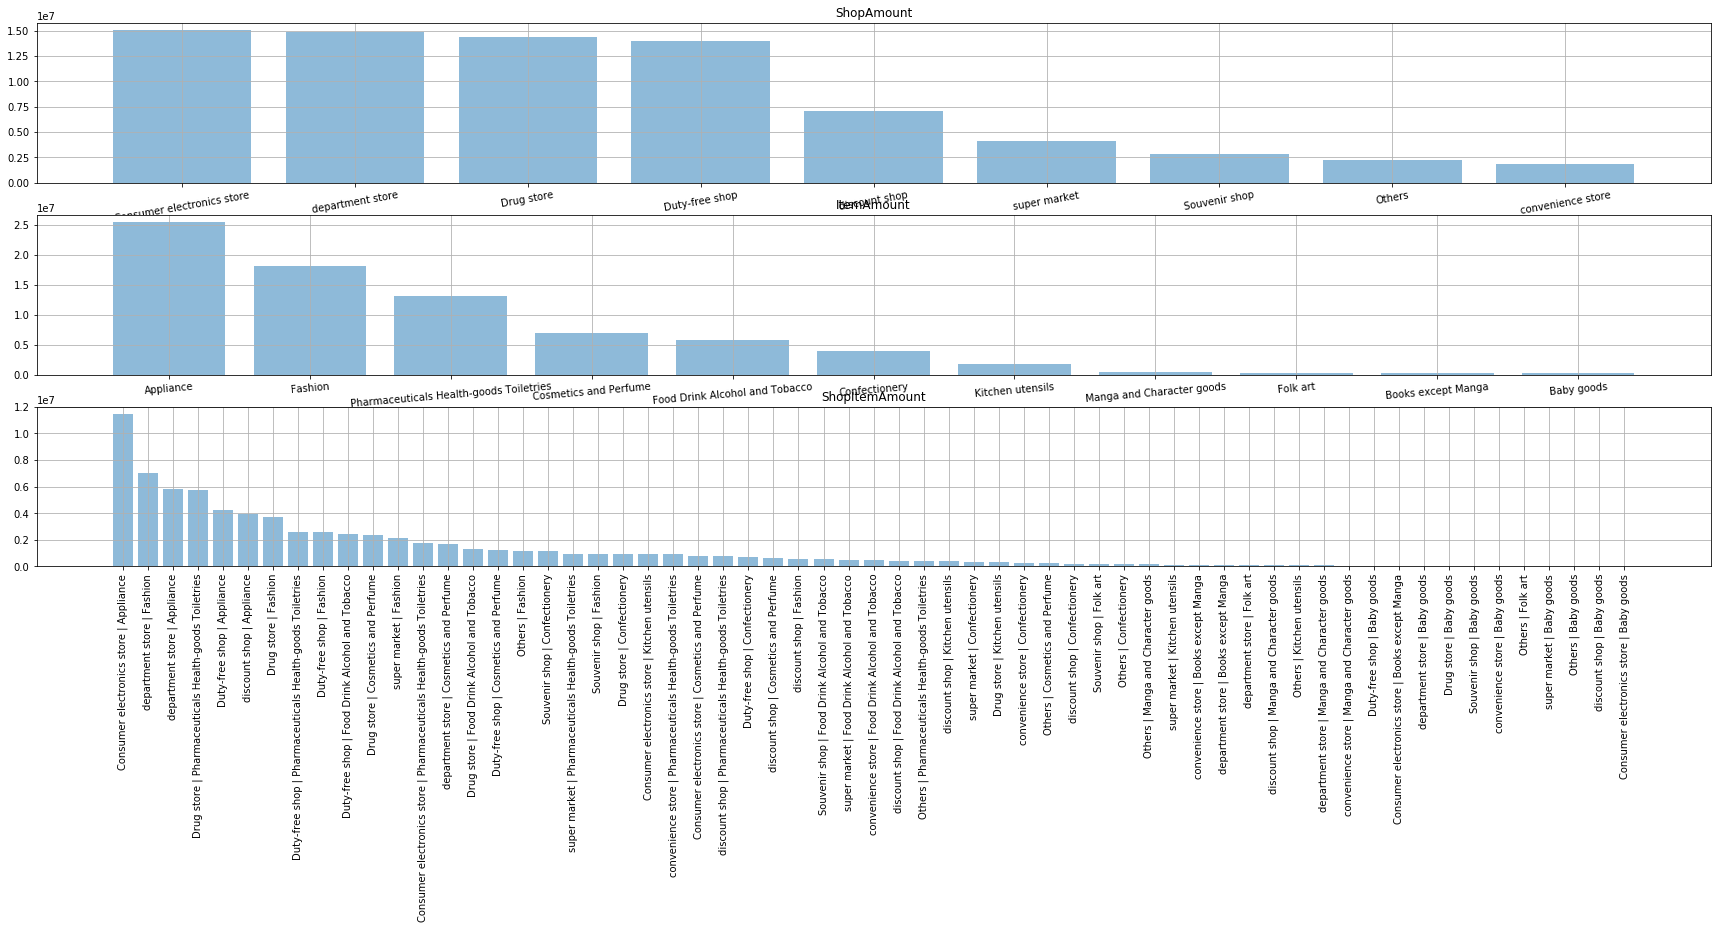

In [115]:
analysis_purchase_amount(purchase_info);

### ①１２ヶ月でどの時期が一番購入額が大きいか

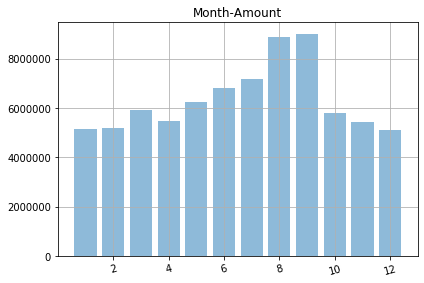

In [116]:
month_purchase_info = purchase_info.groupby('Month_To_Japan').sum()['Amount']

plt.title('Month-Amount')
plt.grid(True)
plt.bar(x=month_purchase_info.index, height=month_purchase_info.values, alpha=0.5);
plt.tight_layout();
plt.xticks(rotation=15);

上記の結果
* 8・9月は購入額が最も多いため，やはり7〜9月に注目するのが効果的

### ピックアップした各月の分析による消費動向

Amount 平均: 6297.020
========== Shop件数 ==========
Drug store        285
Duty-free shop    234
Souvenir shop     183
Name: ShopName, dtype: int64
========== Item件数 ==========
Confectionery                              512
Pharmaceuticals Health-goods Toiletries    160
Food Drink Alcohol and Tobacco             155
Name: ItemName, dtype: int64
========== ShopItem件数 ==========
Souvenir shop | Confectionery     154
Drug store | Confectionery        119
Duty-free shop | Confectionery    101
Name: Shop-Item, dtype: int64


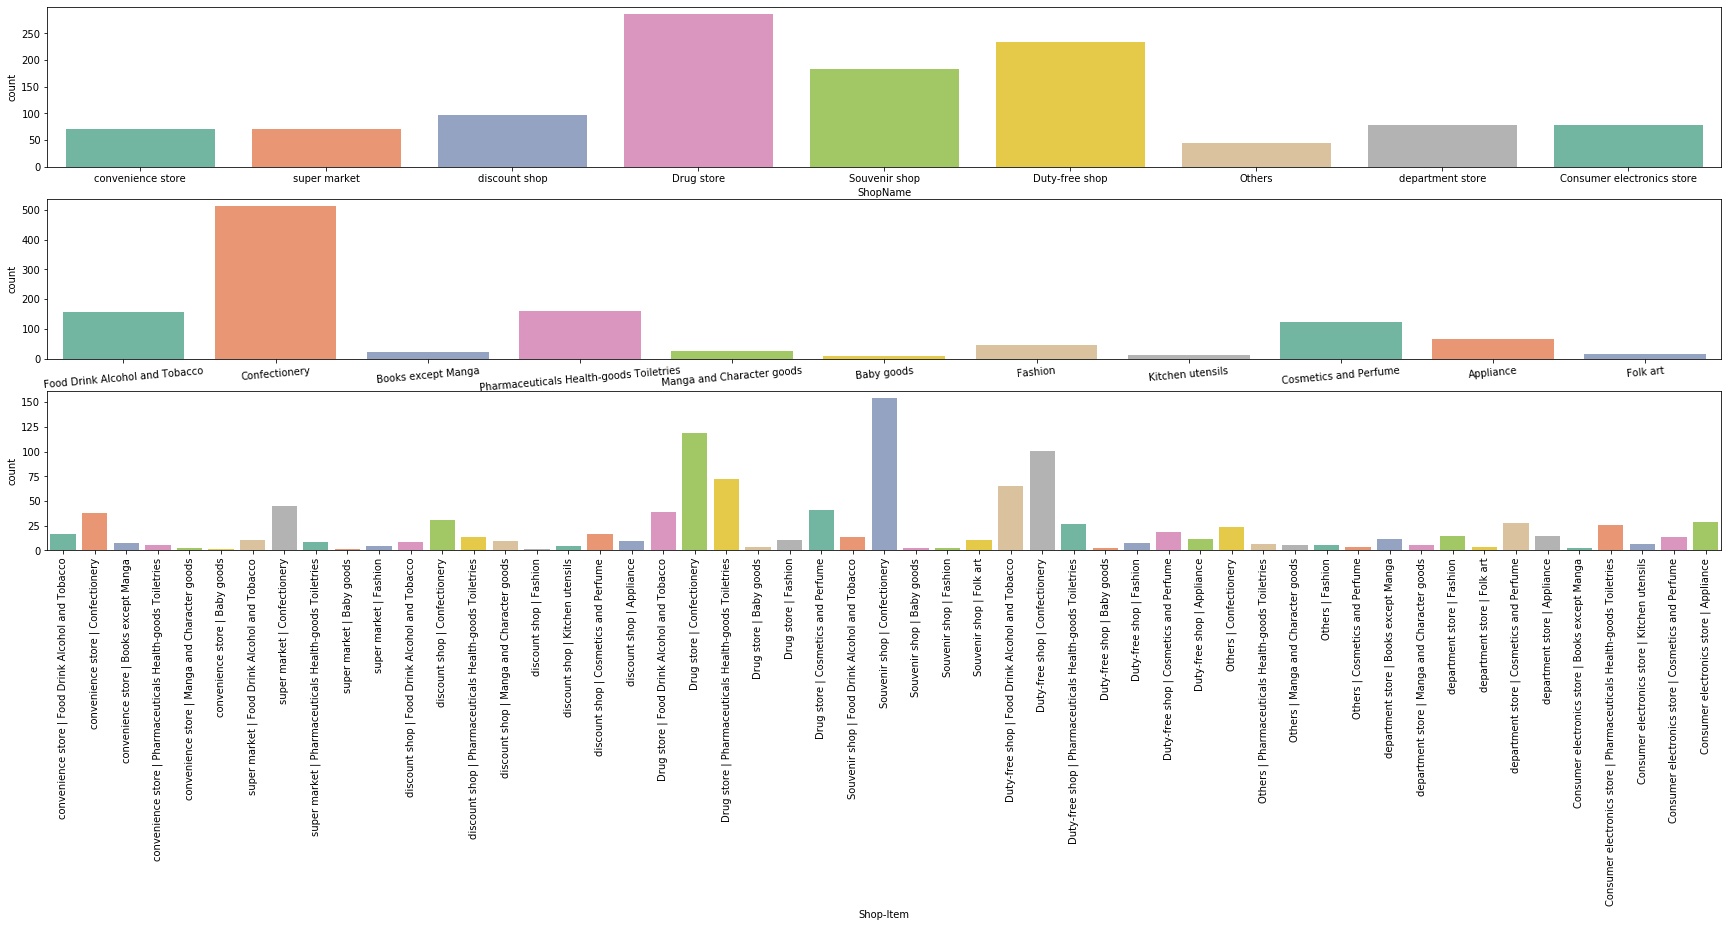

In [144]:
## ７月
July_purchase = purchase_info[purchase_info['Month_To_Japan'] == 7]
analysis_purchase(July_purchase);

========== Shop合計額 ==========
ShopName
Drug store                    1472700
Duty-free shop                1346400
Consumer electronics store    1294100
Name: Amount, dtype: int64
========== Item合計額 ==========
ItemName
Appliance                                  1965900
Fashion                                    1848800
Pharmaceuticals Health-goods Toiletries    1282500
Name: Amount, dtype: int64
========== ShopItem合計額 ==========
Shop-Item
Consumer electronics store | Appliance                  878800
department store | Fashion                              613800
Drug store | Pharmaceuticals Health-goods Toiletries    573200
Name: Amount, dtype: int64


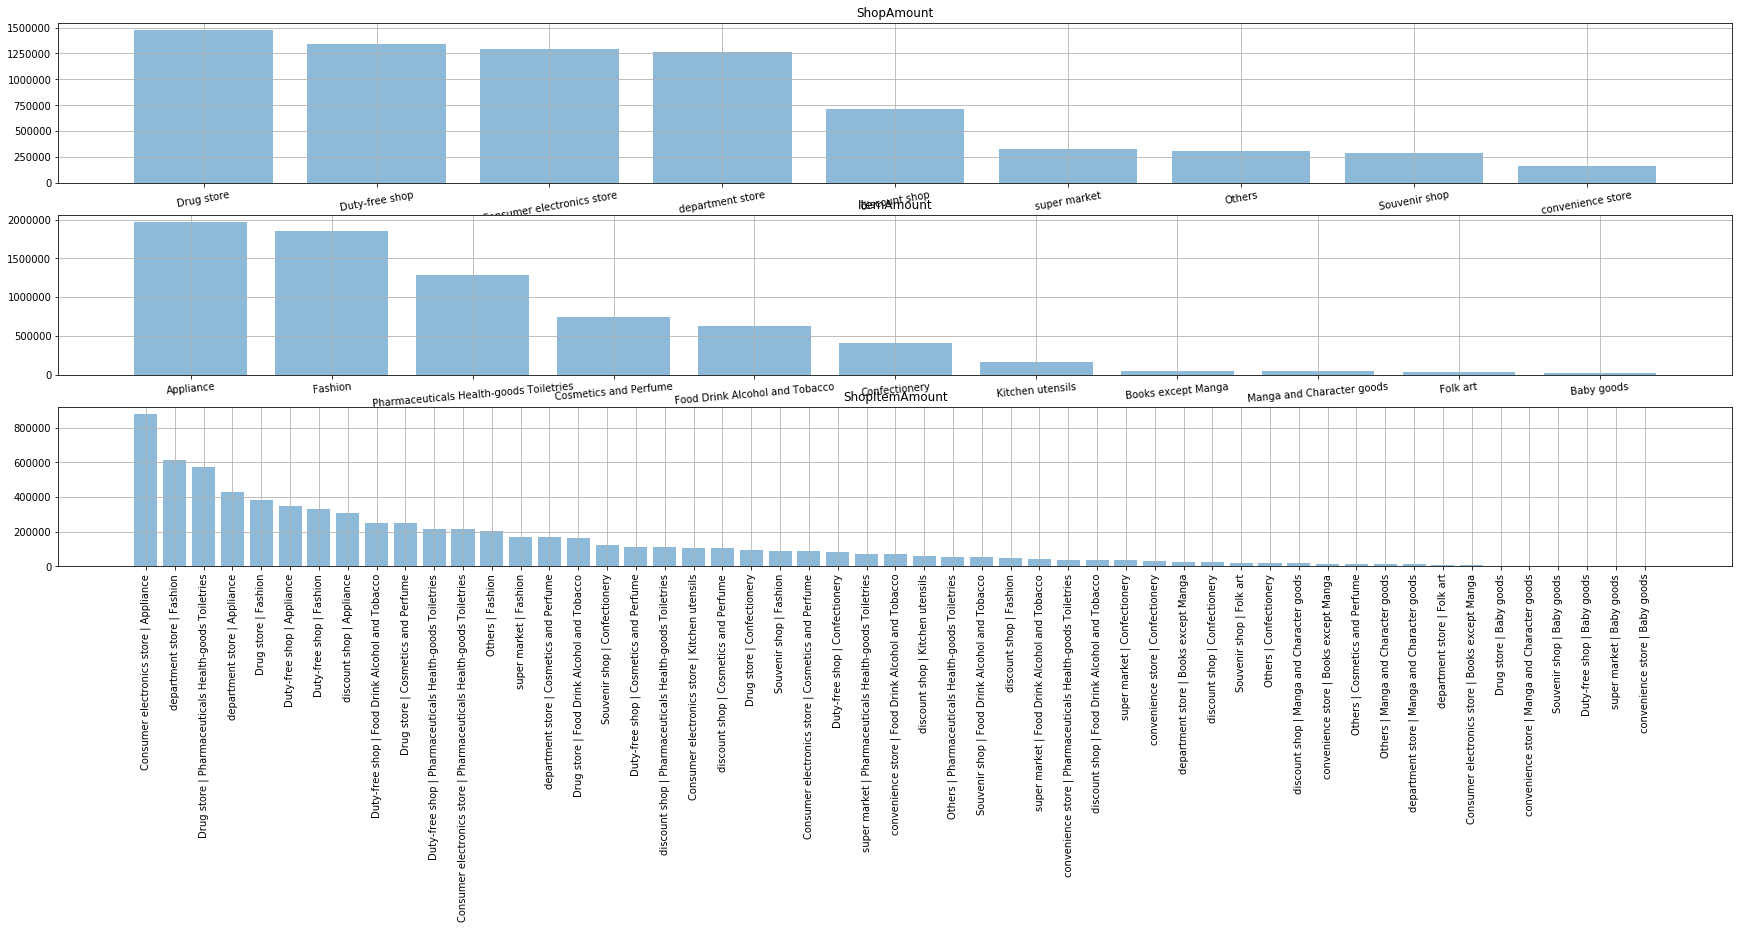

In [145]:
analysis_purchase_amount(July_purchase);

Amount 平均: 6532.524
========== Shop件数 ==========
Drug store        353
Duty-free shop    269
Souvenir shop     208
Name: ShopName, dtype: int64
========== Item件数 ==========
Confectionery                              609
Pharmaceuticals Health-goods Toiletries    194
Food Drink Alcohol and Tobacco             188
Name: ItemName, dtype: int64
========== ShopItem件数 ==========
Souvenir shop | Confectionery     165
Drug store | Confectionery        163
Duty-free shop | Confectionery    116
Name: Shop-Item, dtype: int64


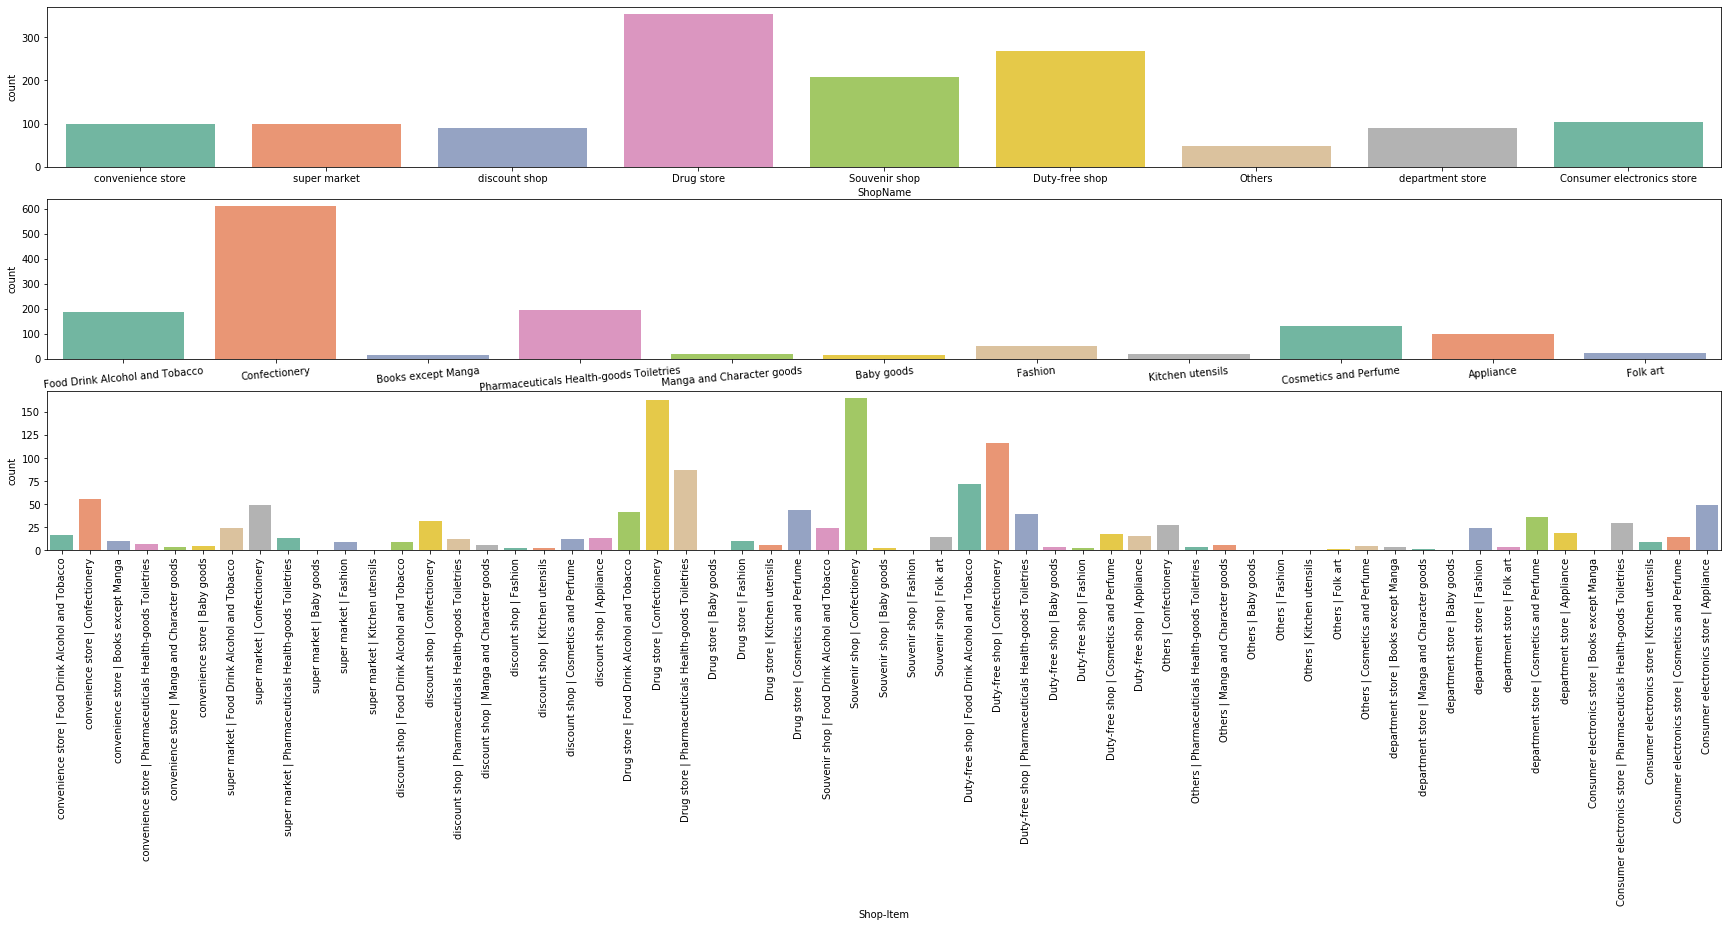

In [146]:
## ８月
August_purchase = purchase_info[purchase_info['Month_To_Japan'] == 8]
analysis_purchase(August_purchase);

========== Shop合計額 ==========
ShopName
Consumer electronics store    1937600
department store              1680700
Drug store                    1673400
Name: Amount, dtype: int64
========== Item合計額 ==========
ItemName
Appliance                                  2913700
Fashion                                    1956000
Pharmaceuticals Health-goods Toiletries    1560200
Name: Amount, dtype: int64
========== ShopItem合計額 ==========
Shop-Item
Consumer electronics store | Appliance                  1473600
department store | Fashion                               878300
Drug store | Pharmaceuticals Health-goods Toiletries     682100
Name: Amount, dtype: int64


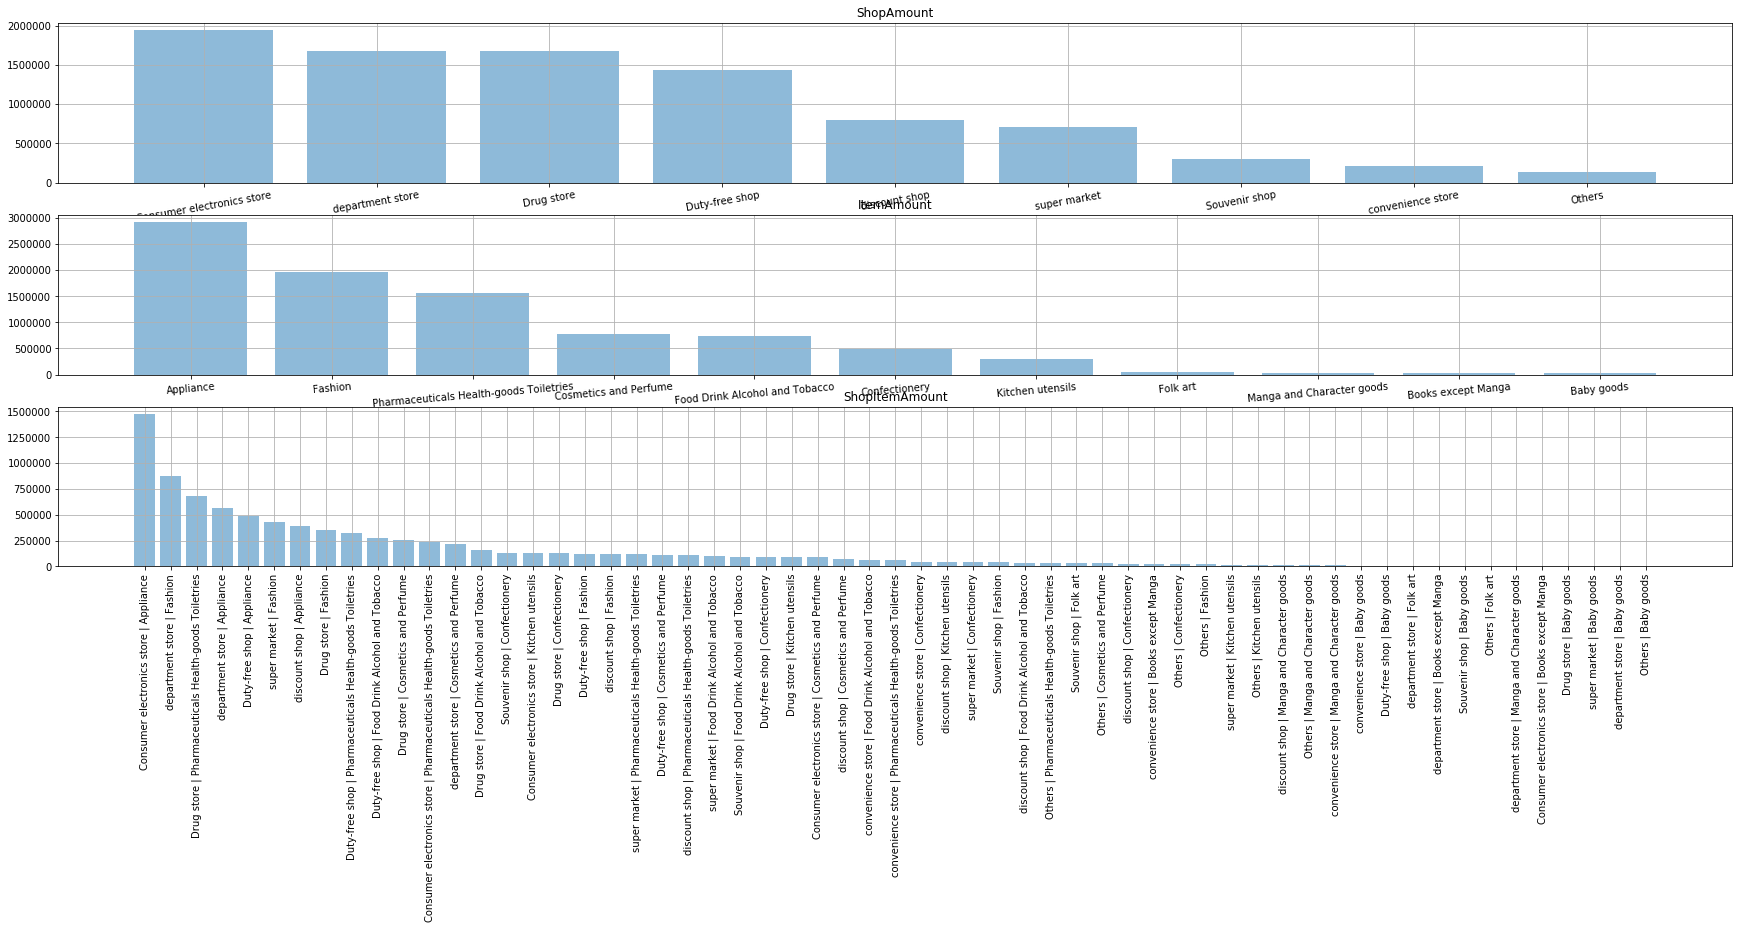

In [147]:
analysis_purchase_amount(August_purchase);

Amount 平均: 7021.167
========== Shop件数 ==========
Drug store        319
Duty-free shop    254
Souvenir shop     194
Name: ShopName, dtype: int64
========== Item件数 ==========
Confectionery                              527
Pharmaceuticals Health-goods Toiletries    207
Food Drink Alcohol and Tobacco             169
Name: ItemName, dtype: int64
========== ShopItem件数 ==========
Souvenir shop | Confectionery                           165
Drug store | Confectionery                              138
Drug store | Pharmaceuticals Health-goods Toiletries     95
Name: Shop-Item, dtype: int64


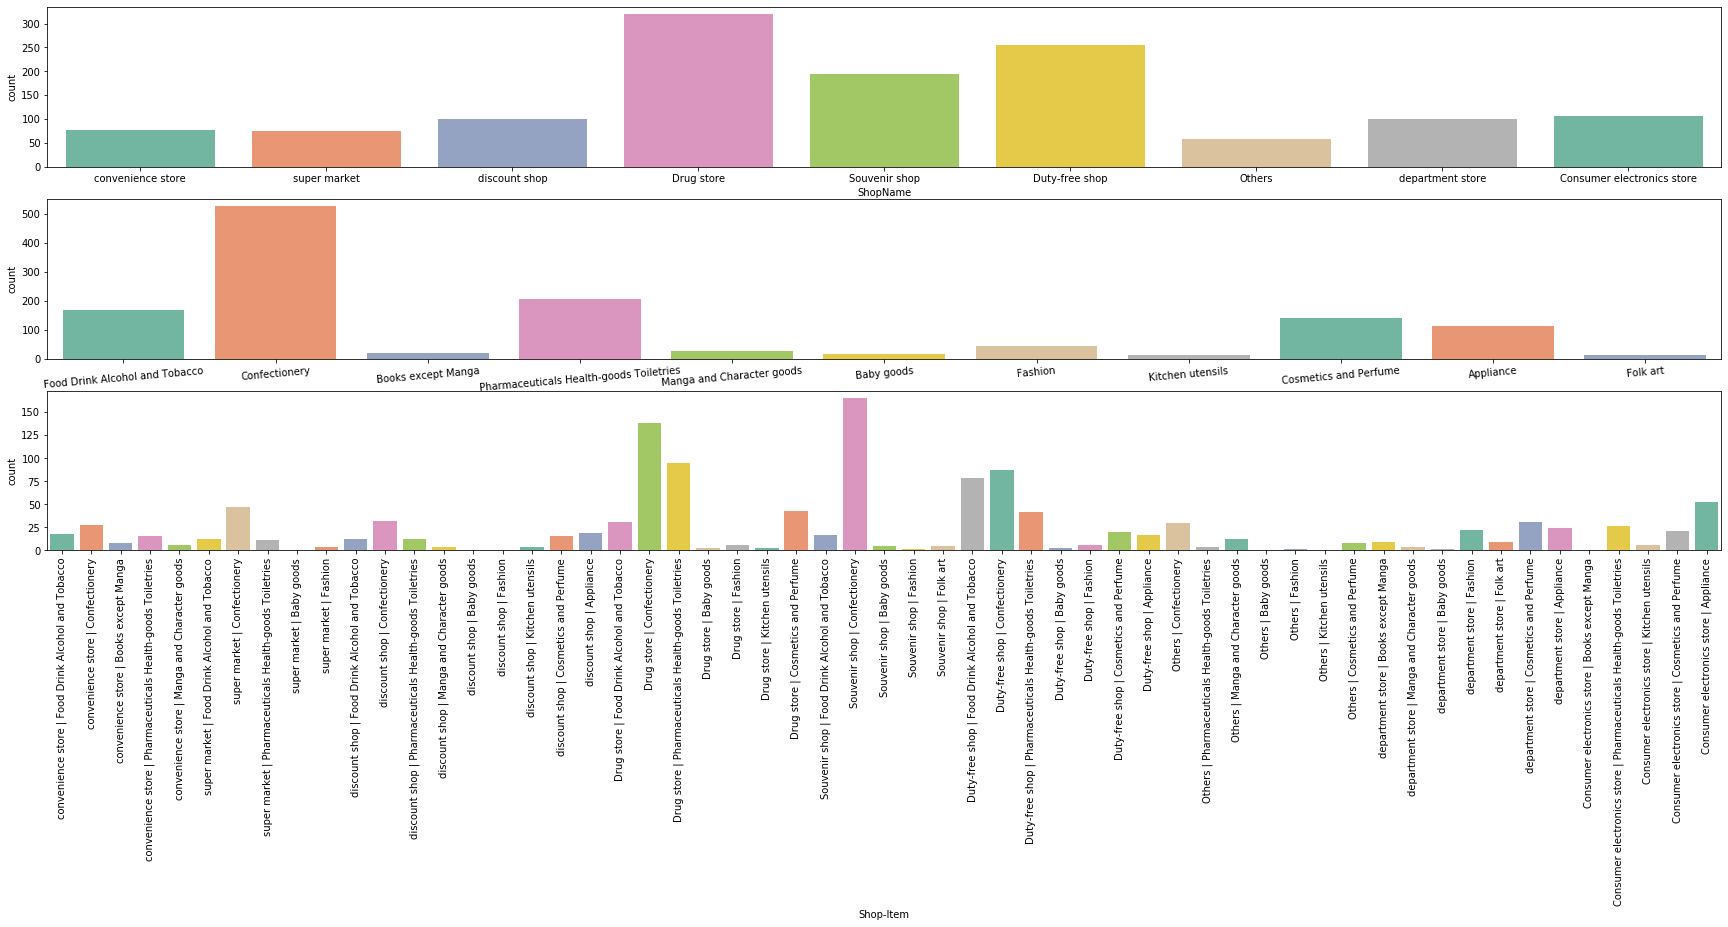

In [148]:
### ９月
September_purchase = purchase_info[purchase_info['Month_To_Japan'] == 9]
analysis_purchase(September_purchase);

========== Shop合計額 ==========
ShopName
Consumer electronics store    1968200
department store              1851200
Duty-free shop                1594800
Name: Amount, dtype: int64
========== Item合計額 ==========
ItemName
Appliance                                  3276400
Fashion                                    1817100
Pharmaceuticals Health-goods Toiletries    1648500
Name: Amount, dtype: int64
========== ShopItem合計額 ==========
Shop-Item
Consumer electronics store | Appliance                  1549900
department store | Fashion                               897500
Drug store | Pharmaceuticals Health-goods Toiletries     757800
Name: Amount, dtype: int64


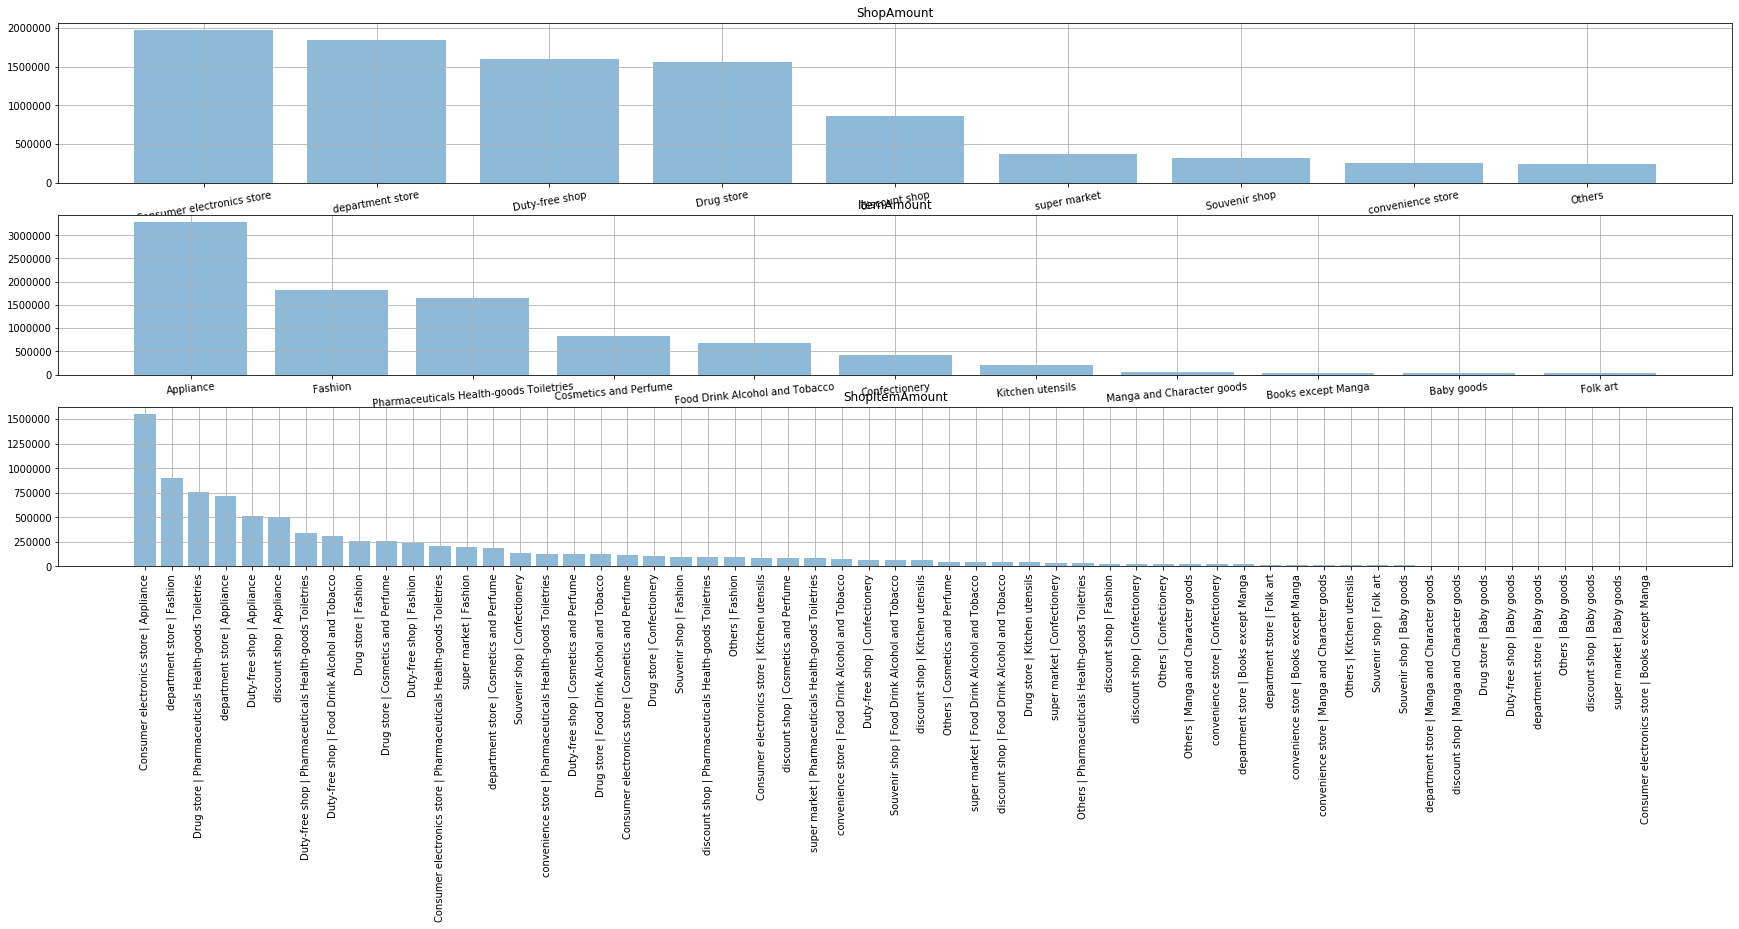

In [149]:
analysis_purchase_amount(September_purchase);

上記に関して
どの時期にも共通していたこととして
* 購入件数はConfectioneryが圧倒的に多いが消費金額としては高くない
* 購入額に関してはAppliance が最も高い
* Consumer electronics storeでのApplianceの購入が最も高い。

## 7~9月に訪れる韓国・中国・台湾の人についての分析

In [150]:
target_tourist_data = tourist.query('(Country == "Korea" or Country == "China" or Country == "Taiwan") \
                                    and (7 <= Month_To_Japan <= 9)')

target_tourist_data.describe()

,Month_To_Japan,Age,SightSeeing_Nature,SightSeeing_City,Shopping_quality,Shopping_resale,Emigration
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,7.985455,48.047273,3.280000,3.305455,1.698182,2.018182,1.040000
std,0.832597,6.406083,0.946449,1.046966,0.943570,1.493183,0.196316
min,7.000000,26.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,7.000000,44.000000,3.000000,3.000000,1.000000,1.000000,1.000000
50%,8.000000,49.000000,3.000000,3.000000,1.000000,1.000000,1.000000
75%,9.000000,52.000000,4.000000,4.000000,2.000000,4.000000,1.000000
max,9.000000,60.000000,5.000000,5.000000,4.000000,5.000000,2.000000


* 年齢平均は48歳
* 自然や都市への観光を目的としてきている。
* 移住への目的はあまりない

In [151]:
## 再掲
tourist.describe()

,Month_To_Japan,Age,SightSeeing_Nature,SightSeeing_City,Shopping_quality,Shopping_resale,Emigration
count,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000
mean,6.623980,48.477977,3.309135,3.305873,1.890701,1.936378,1.040783
std,3.256849,6.579989,0.857066,0.964808,1.051085,1.403505,0.197868
min,1.000000,22.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,45.000000,3.000000,3.000000,1.000000,1.000000,1.000000
50%,7.000000,49.000000,3.000000,3.000000,2.000000,1.000000,1.000000
75%,9.000000,53.000000,4.000000,4.000000,2.000000,3.000000,1.000000
max,12.000000,60.000000,5.000000,5.000000,4.000000,5.000000,2.000000


上記と比較すると
ターゲット抽出後のデータと元データとの間に顕著な特徴が現れているとは考えられない。